# **Set Up the Environment**

In [1]:
#import libraries
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Data collection**

In [2]:
#loading our dataset
data = pd.read_csv("spam-ham_data.csv")

# **Know Our Data : EDA**



1.   Dataset information
2.   Data visualisation




In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8175 non-null   object
 1   label   8175 non-null   object
dtypes: object(2)
memory usage: 127.9+ KB


In [9]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam


In [10]:
data['label'].value_counts()

,count
label,
spam,4125
not_spam,4050


In [11]:
data.isnull().sum()

,0
text,0
label,0


<ipython-input-12-d3bc69ea3f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=data, palette='hls')


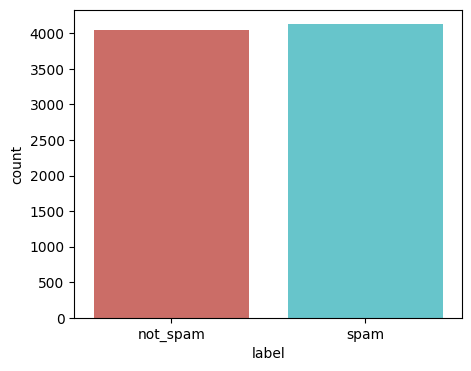

In [12]:
#vizualise the data
plt.figure(figsize=(5,4))
sns.countplot(x='label',data=data, palette='hls')
plt.show()

# **2- Data Pre_precessing**


1.   data cleaning : null-values duplicate values
2.   Transform (encoding)
3.   Split the data into train and test



In [13]:
#duplicate value
data.duplicated().sum()

133

In [14]:
#remove duplicated value
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(8042, 2)

In [17]:
data['label'].value_counts()


,count
label,
spam,4125
not_spam,3917


In [18]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam



**Using** the label_encoder (transformer) to encode the target column

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
data['label'] = LabelEncoder().fit_transform(data['label'])

In [21]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,0
1,"""Get rich quick! Make millions in just days wi...",1
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1
3,[Google AI Blog: Contributing Data to Deepfake...,0
4,Trying to see if anyone already has timestamps...,0


# **Data visualisation**
Chart - 1 : Distribution of Spam vs Not spam

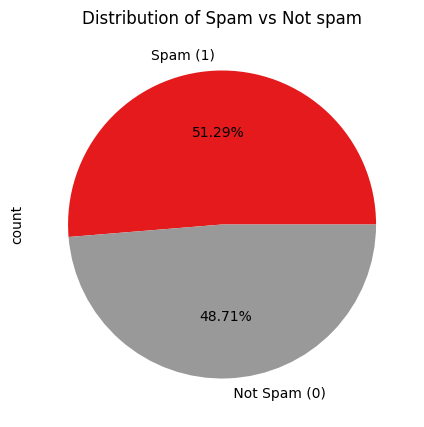

In [22]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Not spam Messages
spread = data['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels explicitly
labels = ['Spam (1)', ' Not Spam (0)']

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%',labels=labels, cmap='Set1')
plt.title(f'Distribution of Spam vs Not spam')

# Display the Chart
plt.show()


From the pie chart, we observed that the dataset contains 51.29% spam messages and 48.71% not spam messages. This indicates that the two categories are nearly balanced, which is advantageous for training machine learning models.

<ipython-input-23-0523b596c8e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


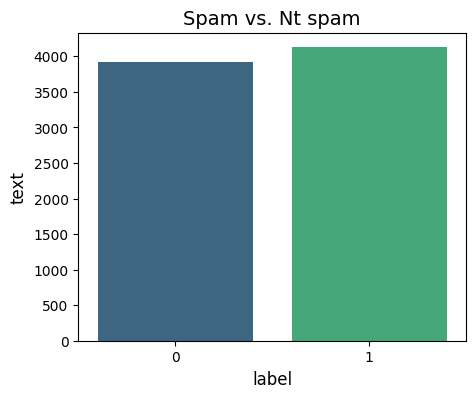

In [23]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Spam vs. Nt spam', fontsize=14)
plt.ylabel('text', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.show()

#**Text Pre_processing**

In [24]:
# clening the text
def clean_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+|WWW\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [25]:
# Apply the cleaning function to the text column
import nltk
nltk.download('punkt_tab')

nltk.download('stopwords')
data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
data.head()

,text,label,cleaned_text
0,hey I am looking for Xray baggage datasets can...,0,hey looking xray baggage datasets provide
1,"""Get rich quick! Make millions in just days wi...",1,get rich quick make million day new revolution...
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,urgent message believe offer hey yeah eye read...
3,[Google AI Blog: Contributing Data to Deepfake...,0,google ai blog contributing data deepfake dete...
4,Trying to see if anyone already has timestamps...,0,trying see anyone already timestamps key event...


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Separate spam and non-spam data
spam_data = data[data['label'] == 1]
non_spam_data = data[data['label'] == 0]

# Initialize vectorizer for unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30)

# Fit and transform spam data
spam_counts = vectorizer.fit_transform(spam_data['cleaned_text'])
spam_features = vectorizer.get_feature_names_out()
spam_occurrences = spam_counts.sum(axis=0).A1  # Total count for each feature in spam

# Transform non-spam data using the same vectorizer
non_spam_counts = vectorizer.transform(non_spam_data['cleaned_text'])
non_spam_features = vectorizer.get_feature_names_out()
non_spam_occurrences = non_spam_counts.sum(axis=0).A1  # Total count for each feature in non-spam

# Create DataFrames for visualization
spam_df = pd.DataFrame({'feature': spam_features, 'count': spam_occurrences}).sort_values(by='count', ascending=False)
non_spam_df = pd.DataFrame({'feature': non_spam_features, 'count': non_spam_occurrences}).sort_values(by='count', ascending=False)


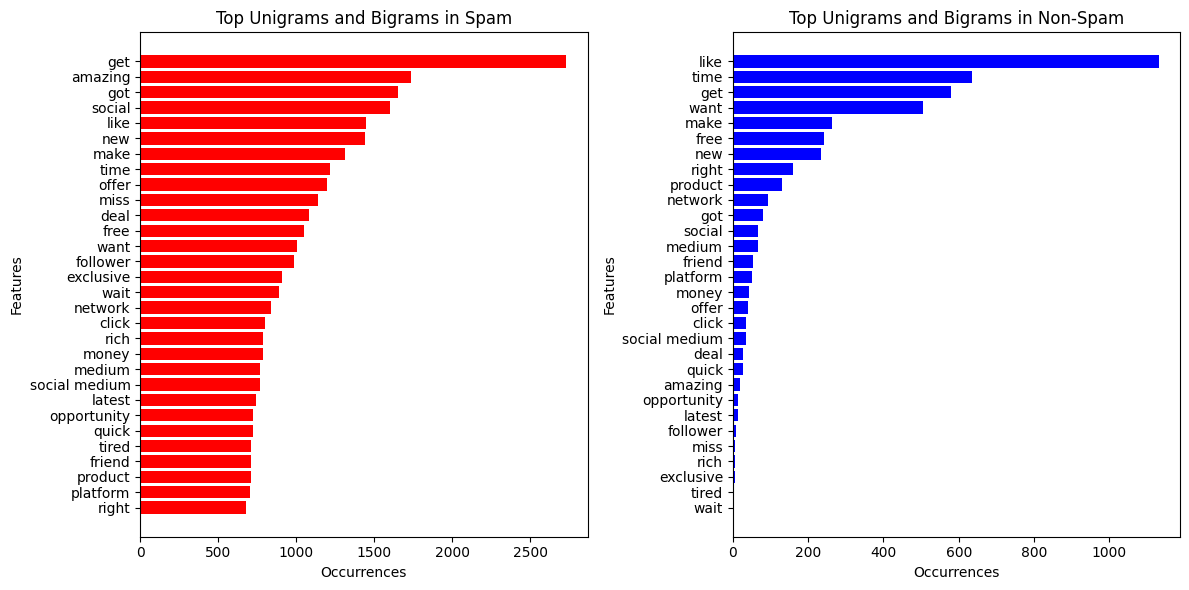

In [28]:
plt.figure(figsize=(12, 6))

# Spam
plt.subplot(1, 2, 1)
plt.barh(spam_df['feature'], spam_df['count'], color='red')
plt.title('Top Unigrams and Bigrams in Spam')
plt.xlabel('Occurrences')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert Y-axis for better readability

# Non-spam
plt.subplot(1, 2, 2)
plt.barh(non_spam_df['feature'], non_spam_df['count'], color='blue')
plt.title('Top Unigrams and Bigrams in Non-Spam')
plt.xlabel('Occurrences')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert Y-axis for better readability

plt.tight_layout()
plt.show()

Unigrams tend to occur more frequently across documents, making them more informative and widely applicable. This increased frequency helps capture the main ideas or themes of the text, which are often based on individual words


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=3000)
message = vectorizer.fit_transform(data['cleaned_text'])

message.shape

(8042, 3000)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(message, data['label'], test_size=0.2, random_state=42)

# **Model selection**

## 1. **MultinomialNB**

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV( MultinomialNB(), param_grid=param_nb, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.1, 'fit_prior': False}


In [49]:
#model 1
model_NB = MultinomialNB(alpha=0.1, fit_prior = False)

# Model training
model_NB.fit(X_train, y_train)

# Model predictions on test set
y_pred = model_NB.predict(X_test)


### **Model evaluation**

In [50]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, recall_score
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100



99.7513983840895

**Cross-validation**

In [51]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(model_NB, message, data['label'], cv=5)
# Print the mean score
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.99564947 0.99689248 0.99875622 0.99813433 0.99875622]
Average cross-validation score: 0.9976377435383679


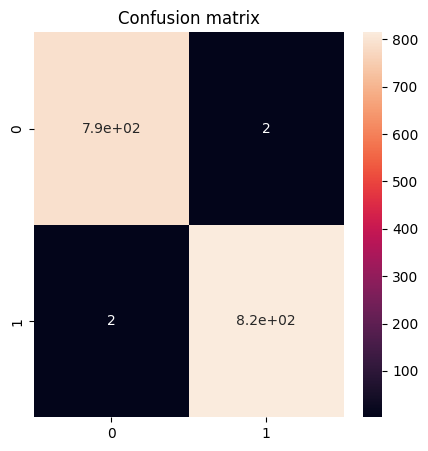

In [52]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [53]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609



## **2. Support Vector Machine (SVM)**

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_search_svm = GridSearchCV(SVC(), param_grid=param_svm, cv=5, verbose=1, n_jobs=-1)


grid_search_svm.fit(X_train, y_train)


print("Best Parameters:", grid_search_svm.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [81]:
from sklearn.metrics import accuracy_score

model = SVC(C=1, degree=2, gamma='scale', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 99.56494717215662


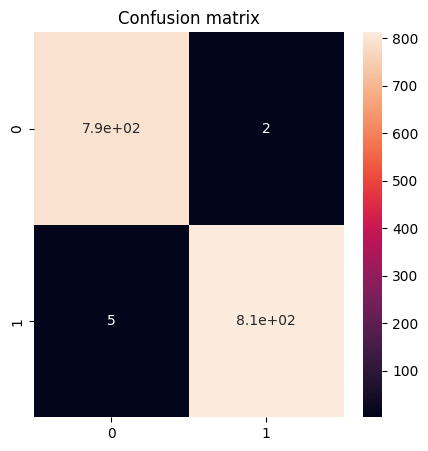

In [58]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

## **3. Decision tree**


### Grid search for hyperparameters

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ds_tree_params = {
    'max_depth': [3, 5, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
}

ds_tree = DecisionTreeClassifier()

search = GridSearchCV(ds_tree, ds_tree_params, cv=5)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'gini', 'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.9794806541307318


### Training model

In [60]:
from sklearn.tree import DecisionTreeClassifier

ds_tree = DecisionTreeClassifier(max_depth=70, min_samples_split=10, min_samples_leaf=1, criterion = 'gini')
ds_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=70, min_samples_split=10)

### Model Evaluation

In [61]:
y_pred = ds_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

97.76258545680547

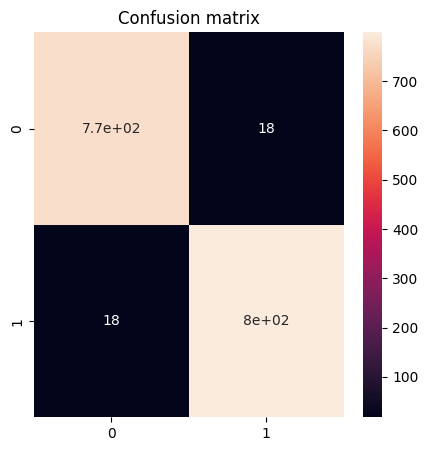

In [62]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       792
           1       0.98      0.98      0.98       817

    accuracy                           0.98      1609
   macro avg       0.98      0.98      0.98      1609
weighted avg       0.98      0.98      0.98      1609



## **4. Logitsic Regression**



### Grid Search

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lg_params = {
    'penalty':['l1','l2','none'],
    'C' : np.logspace(-4,4,10),
    'solver': ['lbfgs','newton-cg','saga'],
    'max_iter'  : [1000]
}

lg = LogisticRegression()

search_lg = GridSearchCV(lg, param_grid =lg_params, cv=5, n_jobs=-1, verbose=1)
search_lg.fit(X_train, y_train)


print(search_lg.best_params_)
print(search_lg.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

{'C': 10000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.9986009152416617


### Model Training

In [70]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C=10000, max_iter=1000 ,penalty='l2', solver='saga')
lg.fit(X_train, y_train)

LogisticRegression(C=10000, max_iter=1000, solver='saga')

### Model Evaluation

In [71]:
y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.62709757613425

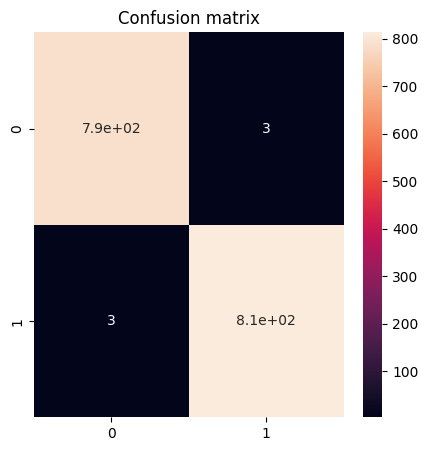

In [72]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609



# **Saving Model**

In [75]:
import pickle

with open('Spam-Detection-Model.pkl', 'wb') as model_file:
    pickle.dump(model_NB, model_file)

with open('Spam-Detection-Vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [84]:
import pickle

with open('Spam-Detection-Model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('Spam-Detection-Vectorizer.pkl', 'rb') as model_file:
    loaded_vectorizer = pickle.load(model_file)

messages = [
    "Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!",
    "Can we reschedule the meeting to 3 PM tomorrow?",
    "Hurry up! Limited-time offer just for you. Get 50% off on all products. Visit our website now!",
    "Don't forget to submit the project report by Friday.",
    "You've been selected for a free trial of our premium services. Reply YES to start now!",
    "Let's catch up this weekend! Let me know your availability.",
    "Win a brand-new iPhone today! Just enter your details on our website.",
    "Reminder: Your doctor's appointment is scheduled for 10 AM tomorrow.",
    "We noticed unusual activity in your bank account. Please enter you details and submit.",
    "Lunch at the new cafe sounds great. How about 1 PM?",
    "win an iphone at WWW.win.iphone.xyz",
]

original_status = [
    "Spam", "Non-Spam", "Spam", "Non-Spam", "Spam", "Non-Spam",
    "Spam", "Non-Spam", "Spam", "Non-Spam", "Spam"
]


cleaned_messages = [clean_text(message) for message in messages]

msg_tfidf = loaded_vectorizer.transform(cleaned_messages)

predictions = model_NB.predict(msg_tfidf)

for comment, prediction, status in zip(messages, predictions, original_status):
    predicted_label = "Spam" if prediction == 1 else "Non-Spam"
    print(f"Message: {comment}")
    print(f"Predicted: {predicted_label}")
    print(f"Original: {status}")
    print()

Message: Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!
Predicted: Spam
Original: Spam

Message: Can we reschedule the meeting to 3 PM tomorrow?
Predicted: Non-Spam
Original: Non-Spam

Message: Hurry up! Limited-time offer just for you. Get 50% off on all products. Visit our website now!
Predicted: Spam
Original: Spam

Message: Don't forget to submit the project report by Friday.
Predicted: Non-Spam
Original: Non-Spam

Message: You've been selected for a free trial of our premium services. Reply YES to start now!
Predicted: Spam
Original: Spam

Message: Let's catch up this weekend! Let me know your availability.
Predicted: Non-Spam
Original: Non-Spam

Message: Win a brand-new iPhone today! Just enter your details on our website.
Predicted: Spam
Original: Spam

Message: Reminder: Your doctor's appointment is scheduled for 10 AM tomorrow.
Predicted: Non-Spam
Original: Non-Spam

Message: We noticed unusual activity in your bank account. Please enter yo